In [16]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam

input_img = Input(shape=(784,))
encoded = Dense(32, activation='relu')(input_img)  # encoding_dim = 32
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# get the encoder and decoder as seperate models
# encoder
encoder = Model(input_img, encoded)

# decoder
encoded_input = Input(shape=(32,))  # encoding_dim = 32
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

adam = Adam(lr=0.001)

# autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.compile(optimizer=adam, loss='binary_crossentropy')

In [17]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [18]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                validation_data=(x_test, x_test),
                verbose=1)

Epoch 1/100
235/235 [==============================] - 1s 3ms/step - loss: 0.2755 - val_loss: 0.1878
Epoch 2/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1699 - val_loss: 0.1519
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1429 - val_loss: 0.1322
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1270 - val_loss: 0.1196
Epoch 5/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1167 - val_loss: 0.1112
Epoch 6/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1095 - val_loss: 0.1052
Epoch 7/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1044 - val_loss: 0.1010
Epoch 8/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1008 - val_loss: 0.0981
Epoch 9/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0984 - val_loss: 0.0962
Epoch 10/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0969 - val_lo

In [19]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 495us/step


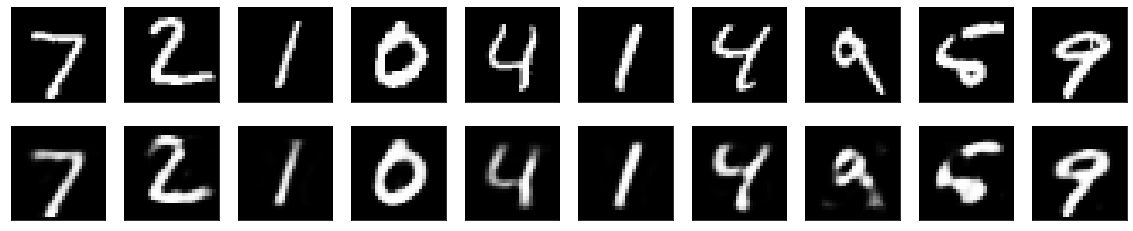

In [20]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()